In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv("gold_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
correlation = gold_data.corr()

<AxesSubplot:>

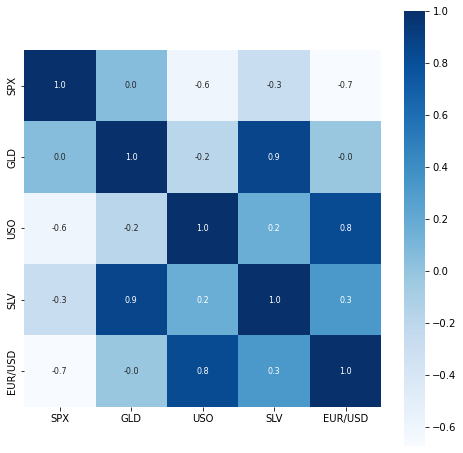

In [7]:
#constructing the Heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [8]:
# correlation values of GLD
print(correlation['GLD']) 

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#checking the distribution of gold price
sns.distplot(gold_data['GLD'], color = 'green')

In [9]:
# train test split
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = 2 )

# Model Training

# Using Random Forest Algorithm

In [11]:
regressor = RandomForestRegressor(n_estimators=100)

In [12]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [13]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [14]:
test_data_prediction

array([168.70679949,  81.90509999, 116.12190017, 127.54810085,
       120.77220126, 154.7622978 , 150.78709832, 126.22890067,
       117.42089862, 125.96810087, 116.60480097, 172.01260086,
       141.1297983 , 167.94219872, 115.18470003, 118.0080002 ,
       138.71520308, 170.05130105, 159.8190032 , 161.7606991 ,
       155.0584002 , 125.46690006, 175.95109994, 157.27970386,
       125.1939004 ,  93.70689957,  77.1113002 , 120.56880006,
       118.97639888, 167.43889994,  87.9239009 , 125.28740028,
        91.15380093, 117.57210013, 121.122399  , 136.5621012 ,
       115.35330143, 115.28470087, 146.78880002, 107.02430096,
       104.63370244,  87.18139785, 126.38390042, 117.76499998,
       152.96159879, 119.60810022, 108.38800016, 108.21329846,
        93.12310046, 127.22959743,  75.56050013, 113.68659924,
       121.35080038, 111.26399924, 118.86659912, 120.43339952,
       159.42909997, 167.67680081, 147.00809706,  85.78699849,
        94.05330045,  86.65929872,  90.41180038, 118.98

# R squared Error for comparision

In [15]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error :', error_score)

R squared error : 0.9899004247979231


# Comparing the actual values and predicted values in a plot

In [16]:
Y_test = list(Y_test)

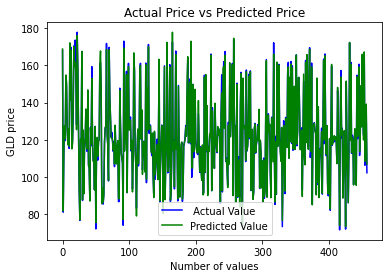

In [17]:
plt.plot(Y_test, color = 'blue',label=' Actual Value')
plt.plot(test_data_prediction, color='green',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

 # Building a Predictive System

In [19]:
input_data = (1400,75,15,1.55)

#changing input data into a numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[85.94339925]
